# **Section 5: Scipy**

Extends capabilities of Numpy.

Contents:
* PDFs and CDFs
* Convolution

## **28. PDF and CDF**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We will check the PDF and CDF of the normal distribution:

In [3]:
from scipy.stats import norm

In [4]:
x = np.linspace(-6,6,1000)

Getting the PDF:

In [7]:
fx = norm.pdf(x, loc=0, scale=1)

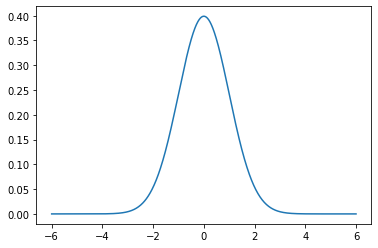

In [9]:
plt.plot(x,fx);

Getting the CDF:

In [10]:
Fx = norm.cdf(x, loc=0, scale=1)

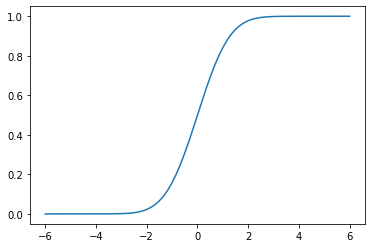

In [11]:
plt.plot(x,Fx);

Finally, getting the log-PDF:

In [12]:
logfx = norm.logpdf(x,loc=0,scale=1)

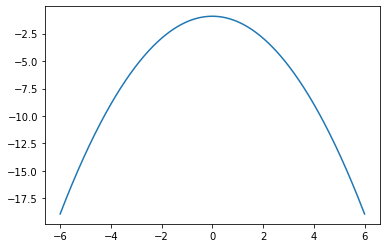

In [14]:
plt.plot(x,logfx);

## **29. Convolution**

Convolution is common operation in ML, image processing, signal processing, etc.
We will do image blurring. First, we download the image:

In [21]:
!wget https://dv-website.s3.amazonaws.com/uploads/2018/05/kf_ann_052418.png

--2021-12-26 03:59:35--  https://dv-website.s3.amazonaws.com/uploads/2018/05/kf_ann_052418.png
Resolving dv-website.s3.amazonaws.com (dv-website.s3.amazonaws.com)... 52.218.216.18
Connecting to dv-website.s3.amazonaws.com (dv-website.s3.amazonaws.com)|52.218.216.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119855 (117K) [image/png]
Saving to: ‘kf_ann_052418.png’

kf_ann_052418.png   100%[===================>] 117.05K   479KB/s    in 0.2s    

2021-12-26 03:59:36 (479 KB/s) - ‘kf_ann_052418.png’ saved [119855/119855]



Then, we import Pillow and open the image:

In [22]:
from PIL import Image
im = Image.open('kf_ann_052418.png')

Converting image to grayscale:

In [24]:
gray = np.mean(im, axis=2)

We will use the Gaussian PDF from previous part:

In [25]:
x = np.linspace(-6,6,50)
fx = norm.pdf(x,loc=0,scale=1)

Filter is a 2D Gaussian:

In [26]:
filt = np.outer(fx,fx)

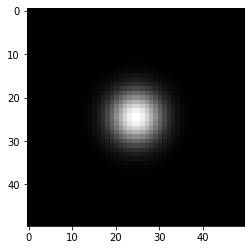

In [27]:
plt.imshow(filt,cmap='gray');

Importing 2D convolution from Scipy and performing convolution:

In [29]:
from scipy.signal import convolve2d

out = convolve2d(gray, filt)

Plot the original and blurred images on subplots:

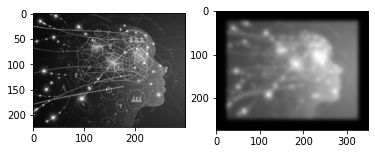

In [31]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out,cmap='gray');

## **30. Scipy exercise**

* Implement edge detection
* Step 1: convolve $H_x$ and $H_y$ with the grayscale image:
$$
H_x = \left[
  \begin{matrix}
  1 & 0 & -1 \\
  2 & 0 & -2 \\
  1 & 0 & -1 \\
  \end{matrix}
  \right], \quad
H_y = \left[
  \begin{matrix}
  1 & 2 & 1 \\
  0 & 0 & 0 \\
  -1 & -2 & -1 \\
  \end{matrix}
  \right]
$$
The results of these convolutions are denoted by $G_x$ and $G_y$.
* Step 2: The edge detected output will be $G = \sqrt{G_x^2 + G_y^2}$.

First construct $H_x$ and $H_y$:

In [35]:
Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Hy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Then calculate $G_x = H_x * A$ and $G_y = H_y * A$:

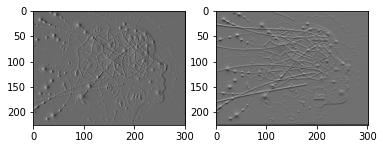

In [36]:
Gx = convolve2d(Hx,gray)
Gy = convolve2d(Hy,gray)

plt.subplot(1,2,1)
plt.imshow(Gx,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Gy,cmap='gray');

And the finally calculating $G$:

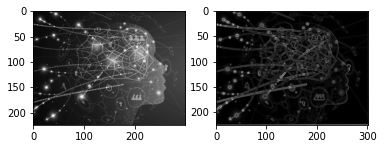

In [39]:
G = np.sqrt(Gx*Gx+Gy*Gy)

plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(G,cmap='gray');